# APPLIED MACHINE LEARNING ASSIGNMENT 1

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021



# PART A: CLASSIFICATION

# Background

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Steps

1. xxx
2. xxx
3. xxx

# Importing All Libraries

In [2049]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Data Importing

A first view of the dataset to understand the data structure and data value.

In [2050]:
df = pd.read_csv('data/train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![](data/data_description.png)

In [2051]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2052]:
# df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Embarked'], 1)
# df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
df.shape

(891, 8)

# Exploratory Data Analysis

In [2053]:
# sns.pairplot(df, hue="Survived", height=2)
# plt.show()

In [2054]:
# corr = df.corr()
# sns.heatmap(corr, cmap="YlGnBu",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values) 
# plt.show()

# Data Preparation

In [2055]:
# 1. SibSp & Parch
df['hasFamily'] = np.where((df['SibSp'] <= 0) & (df['Parch'] <= 0), 0, 1)
df = df.drop(['SibSp', 'Parch'], 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age     Fare Embarked  hasFamily
0         0       3    male  22.0   7.2500        S          1
1         1       1  female  38.0  71.2833        C          1
2         1       3  female  26.0   7.9250        S          0
3         1       1  female  35.0  53.1000        S          1
4         0       3    male  35.0   8.0500        S          0


(891, 7)

In [2056]:
# 2. Group Fare
fare_bins=[0,10,20,40,60,80,100,200,600]
fare_labels=[1,2,3,4,5,6,7,8]
df['Fare_Group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)
df = df.drop('Fare', 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age Embarked  hasFamily Fare_Group
0         0       3    male  22.0        S          1          1
1         1       1  female  38.0        C          1          5
2         1       3  female  26.0        S          0          1
3         1       1  female  35.0        S          1          4
4         0       3    male  35.0        S          0          1


(891, 7)

In [2057]:
# 3. Age (delete OR group)
df.Age.replace('', np.nan, inplace=True)
df['Age'] = df['Age'].fillna(-1)
# df = df.dropna()

age_bins=[-1,0,3,13,20,60,120]
age_labels=['Unknown','Baby','Children','Teenager','Adult','Elderly']
# age_bins=[0,3,13,20,60,120]
# age_labels=['Baby','Children','Teenager','Adult','Elderly']
# age_labels=[1,2,3,4,5,6]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df = df.drop('Age', 1)
print(df.head())
df.shape

   Survived  Pclass     Sex Embarked  hasFamily Fare_Group Age_Group
0         0       3    male        S          1          1     Adult
1         1       1  female        C          1          5     Adult
2         1       3  female        S          0          1     Adult
3         1       1  female        S          1          4     Adult
4         0       3    male        S          0          1     Adult


(891, 7)

In [2058]:
# df.info()

# df.Fare_Group = df.Fare_Group.astype('int64')
# df.Age_Group = df.Age_Group.astype('int64')
# df.info()

# sns.pairplot(df, hue="Survived", height=2)
# plt.show()

In [2059]:
# # 4. Embarked
# from sklearn.preprocessing import OneHotEncoder

# print(df['Embarked'])

# ohe = OneHotEncoder()
# ohe.fit_transform(df['Embarked'].values.reshape(-1,1)).toarray()
# # print(df.head())
# # df.shape

In [2060]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# print(le.fit_transform(df['Embarked']))

In [2061]:
# 5. Sex (Encoding)
df = pd.get_dummies(df)
df = df.drop('Sex_female', 1)
print(df.head())
df.shape

   Survived  Pclass  hasFamily  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
0         0       3          1         1           0           0           1   
1         1       1          1         0           1           0           0   
2         1       3          0         0           0           0           1   
3         1       1          1         0           0           0           1   
4         0       3          0         1           0           0           1   

   Fare_Group_1  Fare_Group_2  Fare_Group_3  ...  Fare_Group_5  Fare_Group_6  \
0             1             0             0  ...             0             0   
1             0             0             0  ...             1             0   
2             1             0             0  ...             0             0   
3             0             0             0  ...             0             0   
4             1             0             0  ...             0             0   

   Fare_Group_7  Fare_Group_8  Age_Gro

(891, 21)

# Train Model

In [2062]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Logistic Regression

In [2063]:
# from sklearn.linear_model import LogisticRegression

# # model = LogisticRegression(solver='newton-cg',multi_class='multinomial')
# model = LogisticRegression()
# model.fit(X_train, y_train)

## 2. K-Nearest Neighbour

In [2064]:
# from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier()
# model.fit(X_train, y_train)

## 3. Navie Bayes

In [2065]:
# from sklearn.naive_bayes import GaussianNB

# model = GaussianNB()
# model.fit(X_train, y_train)

## 4. Classification Tree

In [2066]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

## 5. Support Vector Classifier

# Score Model

In [2067]:
# from sklearn.svm import SVC

# model = SVC()
# model.fit(X_train, y_train)

In [2068]:
# y_predict = model.predict(X_train)

In [2069]:
# from sklearn.metrics import accuracy_score
# print("Accuracy Score (Train Data): {:.2f}%".format(accuracy_score(y_train, y_predict)*100))

In [2070]:
# y_predict = model.predict(X_test)

In [2071]:
# from sklearn.metrics import accuracy_score
# print("Accuracy Score (Test Data): {:.2f}%".format(accuracy_score(y_test, y_predict)*100))

In [2072]:
# import 5 different models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# import different metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Assign 5 models into arrays
models = [LogisticRegression(), 
          KNeighborsClassifier(), 
          GaussianNB(), 
          DecisionTreeClassifier(), 
          SVC()]

#Loop models and compile score into table
rows = []
for i in models:
    # Fit Training Data to model selected
    model = i
    model.fit(X_train, y_train)
    
    # Predict Train Data
    y_predict_train_data = model.predict(X_train)
    x_train_accuracy_score = accuracy_score(y_train, y_predict_train_data)
    x_train_auc_score = roc_auc_score(y_train, y_predict_train_data)

    # Predict Test Data
    y_predict_test_data = model.predict(X_test)
    x_test_accuracy_score = accuracy_score(y_test, y_predict_test_data)
    x_test_auc_score = roc_auc_score(y_test, y_predict_test_data)

    # Calculate Confusion_Matrix
    cm = confusion_matrix(y_test, y_predict_test_data)

    rows.append([i, 
                 "{:.2f}%".format(x_train_accuracy_score*100), 
                 "{:.2f}%".format(x_test_accuracy_score*100), 
                 "{:.2f}".format(x_train_auc_score), 
                 "{:.2f}".format(x_test_auc_score), 
                 cm])

# Display summary result
summary_table = pd.DataFrame(rows, columns=["Algorithm", 
                                            "accuracy_score(train)", 
                                            "accuracy_score(test)", 
                                            "roc_auc_score(train)", 
                                            "roc_auc_score(test)", 
                                            "Confusion Matrix"])
print(summary_table)

                  Algorithm accuracy_score(train) accuracy_score(test)  \
0      LogisticRegression()                80.48%               79.33%   
1    KNeighborsClassifier()                83.71%               78.21%   
2              GaussianNB()                70.22%               71.51%   
3  DecisionTreeClassifier()                87.08%               81.01%   
4                     SVC()                82.72%               80.45%   

  roc_auc_score(train) roc_auc_score(test)      Confusion Matrix  
0                 0.78                0.78  [[88, 17], [20, 54]]  
1                 0.81                0.76  [[92, 13], [26, 48]]  
2                 0.65                0.68  [[95, 10], [41, 33]]  
3                 0.84                0.79   [[96, 9], [25, 49]]  
4                 0.80                0.79  [[92, 13], [22, 52]]  


# Evaluate Model

In [2073]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_predict)
# print(cm)

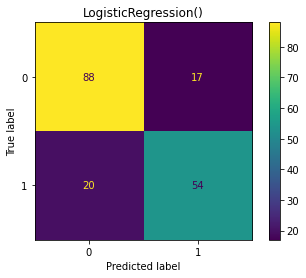

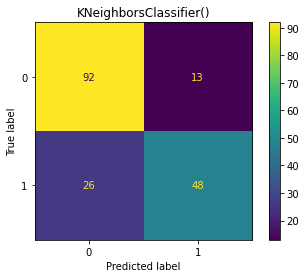

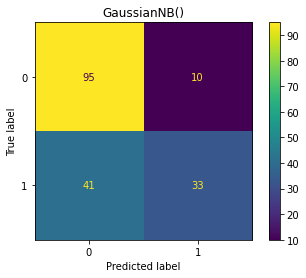

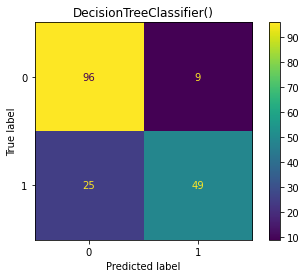

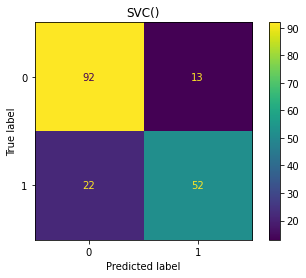

In [2074]:
from sklearn.metrics import plot_confusion_matrix

for i in models:
    # Fit Training Data to model selected
    model = i
    
    plot_confusion_matrix(model, X_test, y_test)
    plt.title(model)
    plt.show()

In [2075]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_predict))

for i in models:
    # Fit Training Data to model selected
    model = i
    model.fit(X_train, y_train)

    # Predict Test Data
    y_predict = model.predict(X_test)
    
    print(classification_report(y_test, y_predict))
    

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       105
           1       0.79      0.65      0.71        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       105
           1       0.77      0.45      0.56        74

    accuracy                           0.72       179
   macro avg       0.73      0.68      0.68       179
weighted avg       0.73      0.72      0.70       179

              preci

# Improve Model

# References / Appendixes

1. https://www.kaggle.com/c/titanic/data
2. xx